.

# Rescheduling with Deviation (vgl Wu)
> hier das Rescheduling (vereinfacht ohne neue Jobs) unter Berücksichtigung der Abweichung ausprobiert

**1. Abweichung vom Originalplan** - verändert auf Operationen-Ebene (statt Jobs)

$$
D_{0}(\sigma)
\;=\;
\sum_{o \in O'} \bigl|\;t_{o}(\sigma) - t_{o}^{0}\bigr|
\;=\;
\sum_{j \in J'} \;\sum_{m \in M}\;
\bigl|\;t_{j m}(\sigma) - t_{j m}^{0}\bigr|
$$

* $D_{0}(\sigma)$: Schedule-Deviation-Maß auf Operationsebene (Abweichung vom Originalplan)  
* $O'$: Menge aller Operationen, die nach dem Störereignis noch nicht begonnen haben  
* $J'$: Menge aller Jobs, die nach dem Störereignis noch nicht begonnen haben  
* $M$:  Menge aller Maschinen  
* $t_{o}(\sigma)$: neue Startzeit der Operation $o$ im Rescheduling-Plan $\sigma$  
* $t_{o}^{0}$: ursprünglich geplante Startzeit der Operation $o$ im Originalplan  
* $t_{j m}(\sigma)$: neue Startzeit der Operation von Job $j$ auf Maschine $m$ im Plan $\sigma$  
* $t_{j m}^{0}$: ursprünglich geplante Startzeit dieser Operation im Originalplan  


**2. Abweichung vom Right-Shift-Plan** - verändert auf Operationen-Ebene (statt Jobs)

$$
D_{1}(\sigma)
\;=\;
\sum_{o \in O'} \bigl|\;t_{o}(\sigma) - t'_{o}\bigr|
\;=\;
\sum_{j \in J'} \sum_{m \in M}
\bigl|\;t_{j m}(\sigma) - t'_{j m}\bigr|
$$

* $D_{1}(\sigma)$: Schedule-Deviation-Maß auf Operationsebene (Abweichung vom Right-Shift-Plan)  
* $O'$: Menge aller Operationen, die nach dem Störereignis noch nicht begonnen haben  
* $J'$: Menge aller Jobs, die nach dem Störereignis noch nicht begonnen haben  
* $M$:  Menge aller Maschinen  
* $t_{o}(\sigma)$: neue Startzeit der Operation $o$ im Rescheduling-Plan $\sigma$  
* $t'_{o}$: geplante Startzeit der Operation $o$ im Right-Shift-Plan  
* $t_{j m}(\sigma)$: neue Startzeit der Operation von Job $j$ auf Maschine $m$ im Plan $\sigma$  
* $t'_{j m}$: geplante Startzeit dieser Operation im Right-Shift-Plan  


## Datensatz laden und generieren

In [8]:
import json
import pandas as pd
pd.set_option('display.max_rows', 20)
import utils.presenter as show
import utils.rolling_planning as rp


import utils.schedule_solver__with_arrivals as ssv_a
from ProductionDaySimulation import ProductionDaySimulation
import utils.converter as convert

In [9]:
# Datei laden
with open("data/jobshop_instances.json", "r", encoding="utf-8") as f:
    jobshop_instances = json.load(f)

instance =  jobshop_instances["instance ft10"]

In [10]:
jssp_data, df_times = rp.init_jobs_with_arrivals(instance, 3, u_b_mmax = 0.75, 
                                                    generate_deadlines = True, deadlines_buffer_factor= 1.9)
show.print_jobs(jssp_data)

Job_000:  [[0, 29], [1, 78], [2, 9], [3, 36], [4, 49], [5, 11], [6, 62], [7, 56], [8, 44], [9, 21]]
Job_001:  [[0, 43], [2, 90], [4, 75], [9, 11], [3, 69], [1, 28], [6, 46], [5, 46], [7, 72], [8, 30]]
Job_002:  [[1, 91], [0, 85], [3, 39], [2, 74], [8, 90], [5, 10], [7, 12], [6, 89], [9, 45], [4, 33]]
Job_003:  [[1, 81], [2, 95], [0, 71], [4, 99], [6, 9], [8, 52], [7, 85], [3, 98], [9, 22], [5, 43]]
Job_004:  [[2, 14], [0, 6], [1, 22], [5, 61], [3, 26], [4, 69], [8, 21], [7, 49], [9, 72], [6, 53]]
Job_005:  [[2, 84], [1, 2], [5, 52], [3, 95], [8, 48], [9, 72], [0, 47], [6, 65], [4, 6], [7, 25]]
Job_006:  [[1, 46], [0, 37], [3, 61], [2, 13], [6, 32], [5, 21], [9, 32], [8, 89], [7, 30], [4, 55]]
Job_007:  [[2, 31], [0, 86], [1, 46], [5, 74], [4, 32], [6, 88], [8, 19], [9, 48], [7, 36], [3, 79]]
Job_008:  [[0, 76], [1, 69], [3, 76], [5, 51], [2, 85], [9, 11], [6, 40], [7, 89], [4, 26], [8, 74]]
Job_009:  [[1, 85], [0, 13], [2, 61], [6, 7], [8, 64], [9, 76], [5, 47], [3, 52], [4, 90], [7, 4

In [11]:
df_times 

,Job,Arrival,Deadline
0,Job_000,14.37,2362.556555
1,Job_001,116.28,3148.115805
2,Job_002,141.78,3518.412818
3,Job_003,192.34,4086.168337
4,Job_004,236.45,2572.747002
...,...,...,...
64,Job_064,3749.15,6085.447002
65,Job_065,3907.00,7111.234311
66,Job_066,4061.64,6409.826555
67,Job_067,4110.12,7141.955805


## Makespan Verfahren

In [13]:
df_plan, _ = ssv_a.solve_jssp_global_makespan(jssp_data, df_times , solver_time_limit=5800, epsilon=0.06)
df_plan

,Job,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_068,4210.59,M1,6497.12,91,2377.53,6588.12
1,Job_068,4210.59,M0,6588.12,85,2462.53,6673.12
2,Job_068,4210.59,M3,6673.12,39,2501.53,6712.12
3,Job_068,4210.59,M2,6712.12,74,2575.53,6786.12
4,Job_068,4210.59,M8,6884.36,90,2763.77,6974.36
...,...,...,...,...,...,...,...
685,Job_000,14.37,M5,215.37,11,212.00,226.37
686,Job_000,14.37,M6,226.37,62,274.00,288.37
687,Job_000,14.37,M7,288.37,56,330.00,344.37
688,Job_000,14.37,M8,344.37,44,374.00,388.37


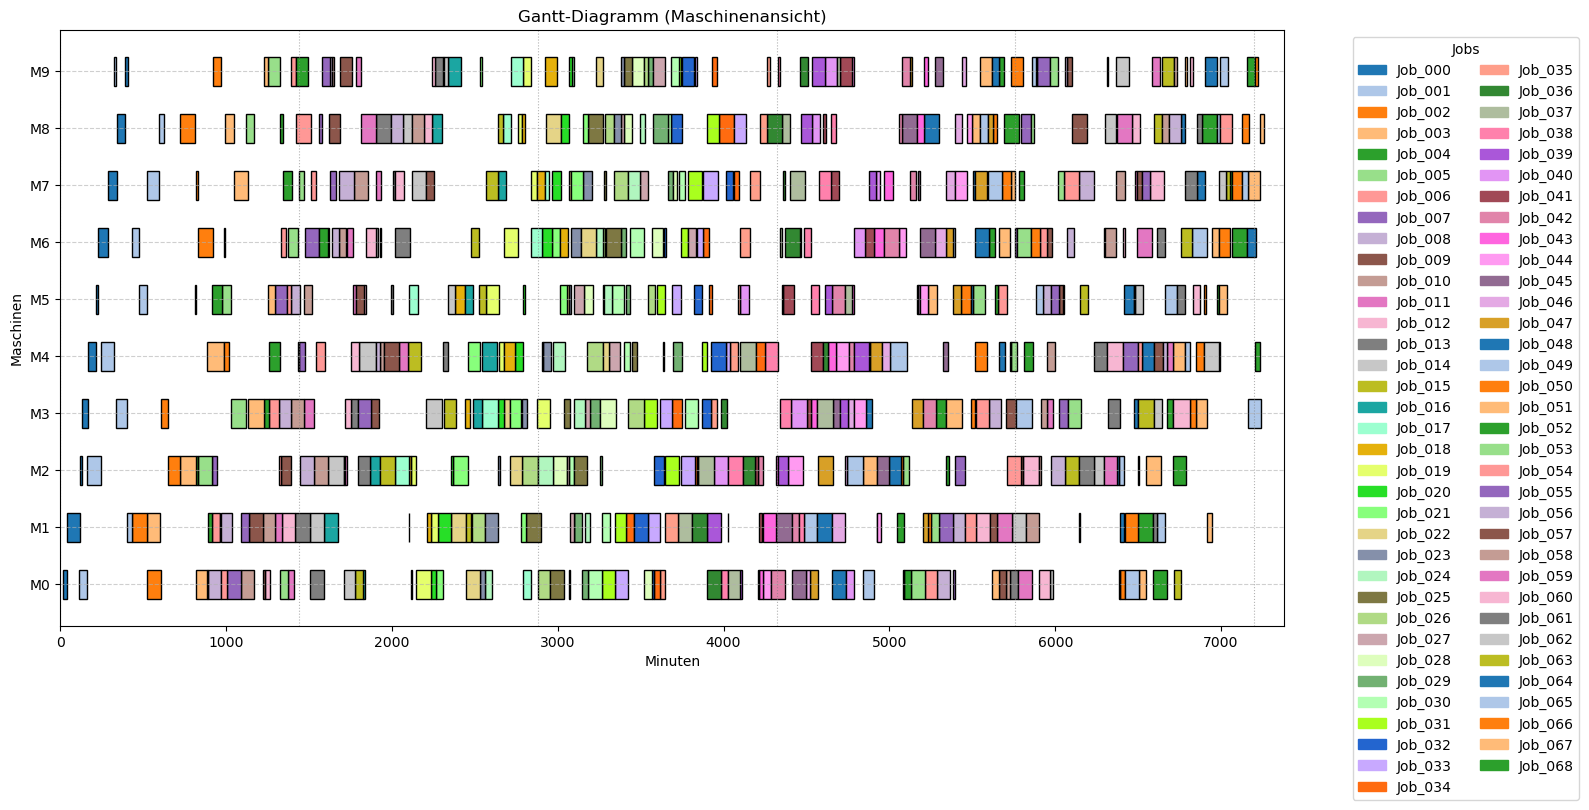

In [14]:
show.plot_gantt_machines(df_plan)

### Simulation

In [16]:
day_start = 0
day_end = 1440

filt = (df_plan["Start"] >=  day_start) & (df_plan["Start"] < day_end)
df_schedule_filtered = df_plan[filt]
df_schedule_filtered

,Job,Arrival,Machine,Start,Processing Time,Flow time,End
550,Job_013,685.32,M1,1416.94,91,822.62,1507.94
560,Job_012,647.75,M0,1236.76,29,618.01,1265.76
561,Job_012,647.75,M1,1338.88,78,769.13,1416.88
570,Job_011,638.78,M1,1292.82,46,700.04,1338.82
571,Job_011,638.78,M0,1371.52,37,769.74,1408.52
...,...,...,...,...,...,...,...
685,Job_000,14.37,M5,215.37,11,212.00,226.37
686,Job_000,14.37,M6,226.37,62,274.00,288.37
687,Job_000,14.37,M7,288.37,56,330.00,344.37
688,Job_000,14.37,M8,344.37,44,374.00,388.37


In [17]:
simulation = ProductionDaySimulation(df_schedule_filtered, vc=0.25)
df_execution, df_undone = simulation.run(start_time = day_start, end_time=day_end)

[00:14:22] Job_000 started on M0
[00:36:34] Job_000 finished on M0 (after 22 minutes 13 seconds)
[00:43:22] Job_000 started on M1
[01:56:16] Job_001 started on M0
[02:02:37] Job_000 finished on M1 (after 79 minutes 16 seconds)
[02:02:37] Job_000 started on M2
[02:13:04] Job_000 finished on M2 (after 10 minutes 27 seconds)
[02:13:04] Job_000 started on M3
[02:53:19] Job_001 finished on M0 (after 57 minutes 03 seconds)
[02:53:19] Job_001 started on M2
[02:57:03] Job_000 finished on M3 (after 43 minutes 59 seconds)
[02:57:03] Job_000 started on M4
[03:43:23] Job_000 finished on M4 (after 46 minutes 20 seconds)
[03:43:23] Job_000 started on M5
[03:56:05] Job_000 finished on M5 (after 12 minutes 41 seconds)
[03:56:05] Job_000 started on M6
[04:04:34] Job_001 finished on M2 (after 71 minutes 14 seconds)
[04:09:16] Job_001 started on M4
[04:52:30] Job_001 finished on M4 (after 43 minutes 14 seconds)
[05:11:19] Job_000 finished on M6 (after 75 minutes 14 seconds)
[05:11:19] Job_000 started on 

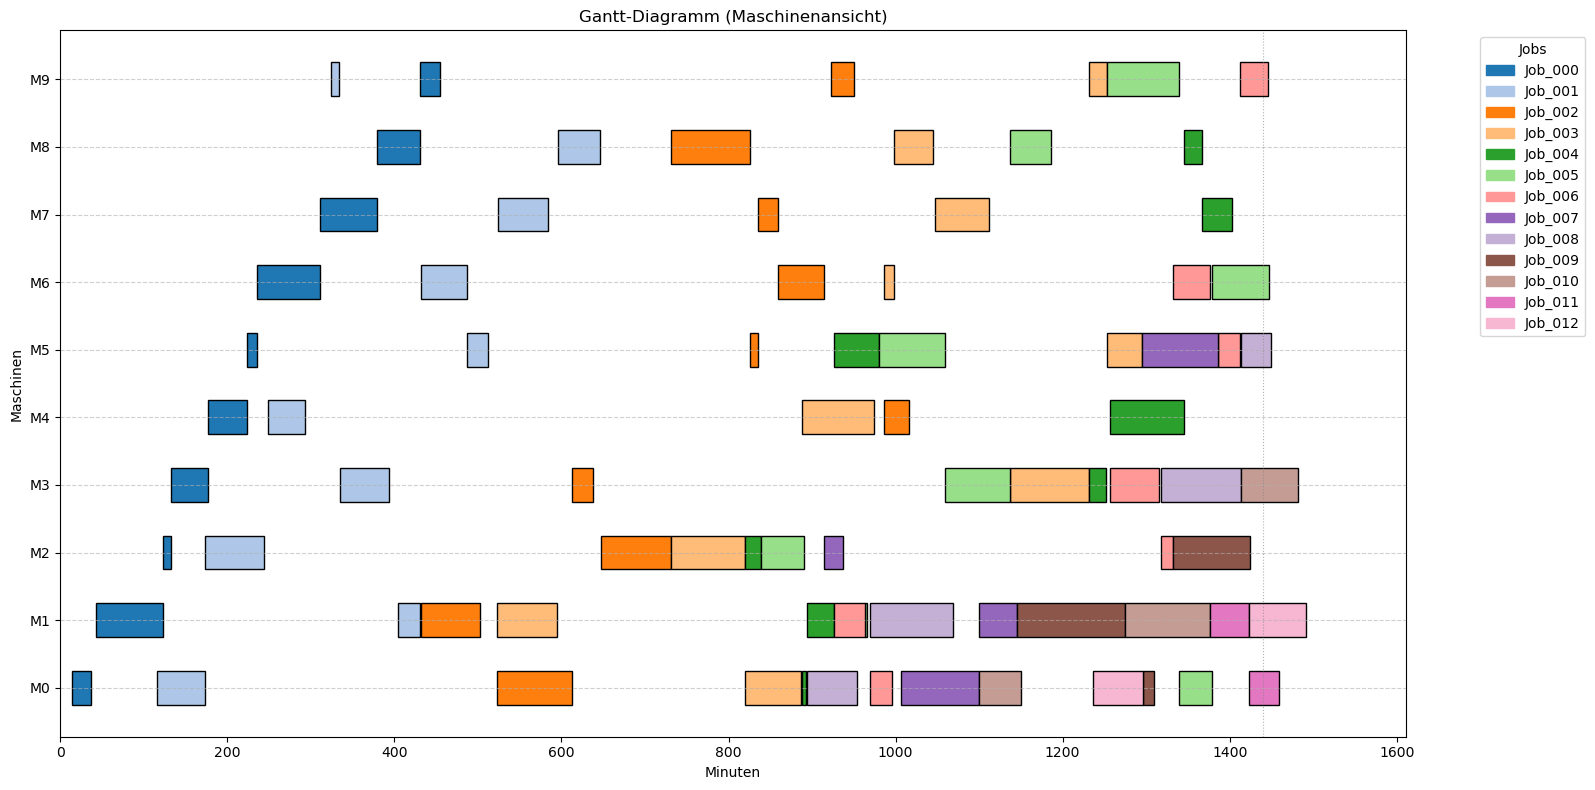

In [18]:
show.plot_gantt_machines(df_execution, duration_column = "Simulated Processing Time")

### Die restlichen Jobs

In [20]:
df_temp = df_plan

df_rest = df_temp.merge(df_execution[["Job", "Machine"]], on=["Job", "Machine"], how="left", indicator=True)
df_rest = df_rest[df_rest["_merge"] == "left_only"].drop(columns=["_merge"])
df_rest = df_rest.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_rest

,Job,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_004,236.45,M9,1422.58,72,1258.13,1494.58
1,Job_004,236.45,M6,1562.58,53,1379.13,1615.58
2,Job_005,316.00,M4,1436.46,6,1126.46,1442.46
3,Job_005,316.00,M7,1442.46,25,1151.46,1467.46
4,Job_006,389.61,M8,1422.52,89,1121.91,1511.52
...,...,...,...,...,...,...,...
604,Job_068,4210.59,M5,6974.36,10,2773.77,6984.36
605,Job_068,4210.59,M7,7055.42,12,2856.83,7067.42
606,Job_068,4210.59,M6,7067.42,89,2945.83,7156.42
607,Job_068,4210.59,M9,7156.42,45,2990.83,7201.42


In [21]:
jssp_data_rest = convert.get_jssp_from_schedule(df_rest)
show.print_jobs(jssp_data_rest)

Job_004:  [[9, 72], [6, 53]]
Job_005:  [[4, 6], [7, 25]]
Job_006:  [[8, 89], [7, 30], [4, 55]]
Job_007:  [[4, 32], [6, 88], [8, 19], [9, 48], [7, 36], [3, 79]]
Job_008:  [[2, 85], [9, 11], [6, 40], [7, 89], [4, 26], [8, 74]]
Job_009:  [[6, 7], [8, 64], [9, 76], [5, 47], [3, 52], [4, 90], [7, 45]]
Job_010:  [[5, 51], [2, 85], [9, 11], [6, 40], [7, 89], [4, 26], [8, 74]]
Job_011:  [[3, 61], [2, 13], [6, 32], [5, 21], [9, 32], [8, 89], [7, 30], [4, 55]]
Job_012:  [[2, 9], [3, 36], [4, 49], [5, 11], [6, 62], [7, 56], [8, 44], [9, 21]]
Job_013:  [[1, 91], [0, 85], [3, 39], [2, 74], [8, 90], [5, 10], [7, 12], [6, 89], [9, 45], [4, 33]]
Job_014:  [[1, 81], [2, 95], [0, 71], [4, 99], [6, 9], [8, 52], [7, 85], [3, 98], [9, 22], [5, 43]]
Job_015:  [[0, 43], [2, 90], [4, 75], [9, 11], [3, 69], [1, 28], [6, 46], [5, 46], [7, 72], [8, 30]]
Job_016:  [[1, 85], [0, 13], [2, 61], [6, 7], [8, 64], [9, 76], [5, 47], [3, 52], [4, 90], [7, 45]]
Job_017:  [[2, 84], [1, 2], [5, 52], [3, 95], [8, 48], [9, 72

### Neues Rescheduling

In [37]:
df_rest

,Job,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_004,236.45,M9,1422.58,72,1258.13,1494.58
1,Job_004,236.45,M6,1562.58,53,1379.13,1615.58
2,Job_005,316.00,M4,1436.46,6,1126.46,1442.46
3,Job_005,316.00,M7,1442.46,25,1151.46,1467.46
4,Job_006,389.61,M8,1422.52,89,1121.91,1511.52
...,...,...,...,...,...,...,...
604,Job_068,4210.59,M5,6974.36,10,2773.77,6984.36
605,Job_068,4210.59,M7,7055.42,12,2856.83,7067.42
606,Job_068,4210.59,M6,7067.42,89,2945.83,7156.42
607,Job_068,4210.59,M9,7156.42,45,2990.83,7201.42


In [41]:
df_jssp = df_rest[["Job", "Machine", "Processing Time"]]
df_jssp

,Job,Machine,Processing Time
0,Job_004,M9,72
1,Job_004,M6,53
2,Job_005,M4,6
3,Job_005,M7,25
4,Job_006,M8,89
...,...,...,...
604,Job_068,M5,10
605,Job_068,M7,12
606,Job_068,M6,89
607,Job_068,M9,45


In [ ]:
import pulp
import pandas as pd

def solve_jssp_global_makespan(df_jssp, df_arrivals, solver_time_limit=300, epsilon=0.06):
    """
    Minimiert den Makespan eines Job-Shop-Problems basierend auf einem DataFrame.

    Parameter:
    - df_jssp: DataFrame mit Spalten ['Job', 'Machine', 'Processing Time'], definiert Operationen in Reihenfolge.
    - df_arrivals: DataFrame mit Spalten ['Job', 'Arrival'] für Ankunftszeiten.
    - solver_time_limit: Zeitlimit für den LP-Solver (in Sekunden).
    - epsilon: Sicherheitsabstand zwischen Operationen auf derselben Maschine.

    Rückgabe:
    - df_schedule: DataFrame mit dem optimierten Zeitplan.
    - makespan_value: Wert des minimalen Makespans.
    """
    # Vorbereitung der Daten
    # Arrival-Zeiten als Dict
    df_arrivals = df_arrivals.sort_values('Arrival').reset_index(drop=True)
    arrival_times = df_arrivals.set_index('Job')['Arrival'].to_dict()

    # Job-Reihenfolge nach Ankunft
    job_names = list(df_arrivals['Job'])
    num_jobs = len(job_names)

    # Operationen pro Job sammeln (in der Zeilenreihenfolge von df_jssp)
    ops_grouped = {
        job: list(group[['Machine', 'Processing Time']].itertuples(index=False, name=None))
        for job, group in df_jssp.groupby('Job', sort=False)
    }
    all_ops = [ops_grouped[job] for job in job_names]

    # Menge aller Maschinen
    all_machines = {mach for job_ops in all_ops for mach, _ in job_ops}

    # LP-Modell
    prob = pulp.LpProblem('JobShop_Makespan', pulp.LpMinimize)

    # Startzeiten-Variablen
    starts = {
        (j, o): pulp.LpVariable(f'start_{j}_{o}', lowBound=0, cat='Continuous')
        for j in range(num_jobs) for o in range(len(all_ops[j]))
    }
    makespan = pulp.LpVariable('makespan', lowBound=0, cat='Continuous')
    prob += makespan

    # Technologische Reihenfolge und Ankunft
    for j, job in enumerate(job_names):
        # Ankunftszeit
        prob += starts[(j, 0)] >= arrival_times[job]
        # Reihenfolge innerhalb des Jobs
        for o in range(1, len(all_ops[j])):
            prev_duration = all_ops[j][o-1][1]
            prob += starts[(j, o)] >= starts[(j, o-1)] + prev_duration

    # Maschinenkonflikte
    bigM = 1e5
    for m in all_machines:
        # alle Operationen auf Maschine m
        related = [(j, o, d) for j in range(num_jobs)
                   for o, (mach, d) in enumerate(all_ops[j]) if mach == m]
        for idx1 in range(len(related)):
            j1, o1, d1 = related[idx1]
            for j2, o2, d2 in related[idx1+1:]:
                if j1 == j2:
                    continue
                y = pulp.LpVariable(f'y_{j1}_{o1}_{j2}_{o2}', cat='Binary')
                prob += starts[(j1, o1)] + d1 + epsilon <= starts[(j2, o2)] + bigM*(1-y)
                prob += starts[(j2, o2)] + d2 + epsilon <= starts[(j1, o1)] + bigM*y

    # Makespan-Bedingungen
    for j in range(num_jobs):
        last_op_idx = len(all_ops[j]) - 1
        prob += makespan >= starts[(j, last_op_idx)] + all_ops[j][last_op_idx][1]

    # Lösen
    solver = pulp.HiGHS_CMD(msg=True, timeLimit=solver_time_limit)
    prob.solve(solver)

    # Ergebnisse extrahieren
    schedule = []
    for (j, o), var in sorted(starts.items()):
        st = var.varValue
        if st is None:
            continue
        mach, dur = all_ops[j][o]
        schedule.append({
            'Job': job_names[j],
            'Machine': mach,
            'Start': round(st, 2),
            'Processing Time': dur,
            'End': round(st + dur, 2)
        })
    df_schedule = pd.DataFrame(schedule)
    df_schedule['Arrival'] = df_schedule['Job'].map(arrival_times)
    df_schedule['Flow time'] = df_schedule['End'] - df_schedule['Arrival']
    df_schedule = df_schedule[['Job', 'Arrival', 'Machine', 'Start', 'Processing Time', 'Flow time', 'End']]

    makespan_value = round(pulp.value(makespan), 3)
    return df_schedule, makespan_value
